# Regressão Logística

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import joblib




In [22]:
df = pd.read_csv('../../dataset/heart-failure-tratado.csv')
df.head(3)

,ExerciseAngina,Oldpeak,ST_Slope,MaxHR,ChestPainType,HeartDisease
0,0,0.0,2,172,1,0
1,0,1.0,1,156,2,1
2,0,0.0,2,98,1,0


In [23]:
# Features
x = df.drop(columns=['HeartDisease'])

# Target
y = df['HeartDisease']

In [24]:
# Split do dataset em conjuntos de treinamento e teste.

# # 70% treino, 30% teste
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=45)

# 90% treino, 10% teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=45)




In [25]:
modelo = LogisticRegression()
modelo.fit(x_train, y_train)

joblib.dump(modelo, 'modelo_regressao_logistica.joblib')

['modelo_regressao_logistica.joblib']

In [26]:
# Fazendo previsões sobre o conjunto de teste
y_pred = modelo.predict(x_test)

In [27]:
# Calculando métricas de desempenho (acurácia, precisão, revocação e F1-Score)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Acurácia: 0.8478260869565217
Precisão: 0.8478260869565217
Recall: 0.8478260869565217
F1-Score: 0.8478260869565217


In [28]:
## Criar arquivo do modelo treinado
# joblib.dump(modelo, 'modelo_regressao_logistica.pkl')

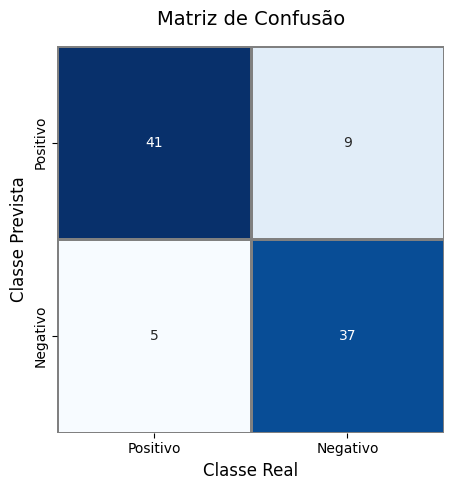

In [29]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Positivo', 'Negativo'],
            yticklabels=['Positivo', 'Negativo'],
            linewidths=1, linecolor='gray', square=True)

plt.title("Matriz de Confusão", fontsize=14, pad=15)
plt.xlabel("Classe Real", fontsize=12)
plt.ylabel("Classe Prevista", fontsize=12)
plt.tight_layout()
plt.show()

# Tuning dos hiperparâmetros

In [30]:
# 90% treino, 10% teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=45)

In [31]:
modelo = LogisticRegression()

# Encontrar os melhores parametros para o modelo (Tunning de hiperparâmetros)
parametros = [
    # Dicionário 1: Para o solver 'liblinear' que suporta l1 e l2
    {
        'solver': ['liblinear'],
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1, 10]
    },
    
    # Dicionário 2: Para solvers que suportam l2
    {
        'solver': ['lbfgs', 'newton-cg', 'sag'],
        'penalty': ['l2', None], # <-- CORRIGIDO AQUI
        'C': [0.01, 0.1, 1, 10]
    },
    
    # Dicionário 3: Para o solver 'saga'
    {
        'solver': ['saga'],
        'penalty': ['l1', 'l2', 'elasticnet', None],
        'C': [0.01, 0.1, 1, 10],
        'l1_ratio': np.linspace(0, 1, 10)
    }
]


clf = GridSearchCV(estimator=modelo,
    param_grid=parametros,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2)

clf.fit(x_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


,estimator,LogisticRegression()
,param_grid,"[{'C': [0.01, 0.1, ...], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}, {'C': [0.01, 0.1, ...], 'penalty': ['l2', None], 'solver': ['lbfgs', 'newton-cg', ...]}, ...]"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [32]:
# Exibindo os melhores parâmetros encontrados
print(f"Melhores parâmetros encontrados: {clf.best_params_}")
best_model = clf.best_estimator_
best_model

Melhores parâmetros encontrados: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [33]:
# Fazendo previsões sobre o conjunto de teste com o melhor modelo
y_pred = best_model.predict(x_test)

In [34]:
# Calculando métricas de desempenho (acurácia, precisão, revocação e F1-Score)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Acurácia: 0.8369565217391305
Precisão: 0.8369565217391305
Recall: 0.8369565217391305
F1-Score: 0.8369565217391305


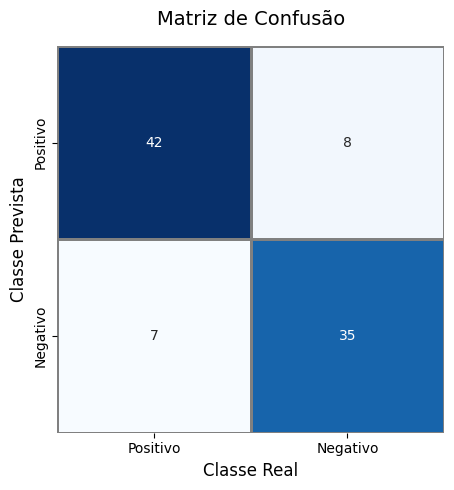

In [35]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Positivo', 'Negativo'],
            yticklabels=['Positivo', 'Negativo'],
            linewidths=1, linecolor='gray', square=True)

plt.title("Matriz de Confusão", fontsize=14, pad=15)
plt.xlabel("Classe Real", fontsize=12)
plt.ylabel("Classe Prevista", fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# Passando um novo dado para fazer a previsão
import joblib
modelo = joblib.load('../../modelo_regressao_logistica.joblib')

# Entrada: ['ExerciseAngina' 'Oldpeak' 'ST_Slope' 'MaxHR' 'ChestPainType']
novo_dado = np.array([[0, 1.5, 1, 130, 4]])

# Faz a previsão
resultado = modelo.predict(novo_dado)
probabilidade = modelo.predict_proba(novo_dado)[0][1] 
print("Previsão:", resultado)
print(f"Probabilidade de classe positiva: {probabilidade * 100:.2f}%")



Previsão: [0]
Probabilidade de classe positiva: 28.44%


c:\Users\Paty\Documents\Codes\5mlet_fase_3\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Paty\Documents\Codes\5mlet_fase_3\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [42]:
print(modelo.feature_names_in_)

['ExerciseAngina' 'Oldpeak' 'ST_Slope' 'MaxHR' 'ChestPainType']
